# <h1>Pyber Solution</h1>
<div>

<table style="width:100%" align="right" border="1">
    <caption>These are the observable trends</caption>
    <tr><th>Serial #</th><th>Observation</th></tr>
    <tr><td>1</td><td>The number of drivers and rides are <b>overwhelmingly ( >60% )</b> urban.</td></tr>
    <tr><td>2</td><td>The mean fare per ride is lowest in urban areas and highest in rural areas.</td></tr>
    <tr><td>3</td><td>The <u>revenue per driver</u> for rural drivers is much higher <b>( >2.5 times ) </b> that of urban drivers.</td></tr>
</table>
</div>

In [1]:
##Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
##Create a path to the data files
ride_csv_path = "Resources/ride_data.csv"
city_csv_path = "Resources/city_data.csv"

In [3]:
##Read and verify the ride data
ride_df = pd.read_csv(ride_csv_path)
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [4]:
##Read and verify the city data
city_df = pd.read_csv(city_csv_path)
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [5]:
##Create a dataframe with ride count per city
ride_df_groupedby_city = ride_df.groupby("city").count()
ride_count_by_city_df = pd.DataFrame(ride_df_groupedby_city)
ride_count_by_city_df.to_excel("ridegroupedbycity.xlsx")
ride_count_by_city_df["ride count"] = ride_count_by_city_df["date"]
ride_count_by_city_df.drop(axis=1,labels=["date","fare","ride_id"],inplace=True)
ride_count_by_city_df.head()

,ride count
city,
Alvarezhaven,31
Alyssaberg,26
Anitamouth,9
Antoniomouth,22
Aprilchester,19


In [6]:
##Create a dataframe with average fare per city
ride_mean_fares_by_city = ride_df.groupby("city").mean()
ride_mean_fares_by_city_df = pd.DataFrame(ride_mean_fares_by_city)
ride_mean_fares_by_city_df["mean fare"] = round(ride_mean_fares_by_city_df["fare"],2)
ride_mean_fares_by_city_df.drop(axis=1,labels=["fare","ride_id"],inplace=True)
ride_mean_fares_by_city_df.head()

,mean fare
city,
Alvarezhaven,23.93
Alyssaberg,20.61
Anitamouth,37.32
Antoniomouth,23.62
Aprilchester,21.98


In [7]:
##Merge the two above to create a ride summary per city
ride_summary_df = pd.merge(ride_mean_fares_by_city_df,ride_count_by_city_df,left_index=True,right_index=True)
ride_summary_df.head()

,mean fare,ride count
city,,
Alvarezhaven,23.93,31
Alyssaberg,20.61,26
Anitamouth,37.32,9
Antoniomouth,23.62,22
Aprilchester,21.98,19


In [8]:
##Summarize the city data and index by city
city_df.sort_values(axis=0,by=["city"],inplace=True)
city_df.reset_index(inplace=True)
city_df.set_index(["city"],inplace=True)
#city_df.head()
city_df.drop(axis=1,labels=["index"],inplace=True)
city_df.head()

,driver_count,type
city,,
Alvarezhaven,21,Urban
Alyssaberg,67,Urban
Anitamouth,16,Suburban
Antoniomouth,21,Urban
Aprilchester,49,Urban


In [9]:
## This just shows that city 'Port James' occurs twice in data which might be skewing results

city_df.loc[["Port James"]]

,driver_count,type
city,,
Port James,15,Suburban
Port James,3,Suburban


In [10]:

#Check all the rides of the duplicate row to see if there is any additional information
ride_df[ride_df["city"] == "Port James"]

,city,date,fare,ride_id
1625,Port James,2016-12-04 06:16:36,15.77,2259499336994
1662,Port James,2016-05-16 21:25:03,26.26,4051110168629
1663,Port James,2016-01-04 22:46:29,20.25,3994763896598
1666,Port James,2016-01-27 19:25:42,21.86,2433830274897
1674,Port James,2016-05-30 15:35:47,38.05,424462809740
1704,Port James,2016-06-05 02:06:00,14.67,9583600979958
1758,Port James,2016-01-05 05:44:27,26.30,4033584825314
1777,Port James,2016-04-24 17:14:17,22.79,4853299324427
1808,Port James,2016-04-02 08:25:37,32.73,5462893938573
1835,Port James,2016-06-10 07:17:00,44.75,727817561646


In [11]:
##Total the driver counts for duplicate rows
city_df = pd.DataFrame(city_df.groupby(["city","type"]).sum())
city_df.head()

,,driver_count
city,type,
Alvarezhaven,Urban,21
Alyssaberg,Urban,67
Anitamouth,Suburban,16
Antoniomouth,Urban,21
Aprilchester,Urban,49


In [12]:
##Verify that it has been totaled

city_df.loc[["Port James"]]

,,driver_count
city,type,
Port James,Suburban,18


In [13]:
##Set the index back to city name
city_df.reset_index(inplace=True)
city_df.set_index(["city"],inplace=True)
city_df

,type,driver_count
city,,
Alvarezhaven,Urban,21
Alyssaberg,Urban,67
Anitamouth,Suburban,16
Antoniomouth,Urban,21
Aprilchester,Urban,49
Arnoldview,Urban,41
Campbellport,Suburban,26
Carrollbury,Suburban,4
Carrollfort,Urban,55


In [14]:
## Now merge city and ride summary data to get a bigger picture
merged_df = pd.merge(city_df,ride_summary_df,left_index=True,right_index=True)
merged_df.rename(columns={"driver_count": "driver count"},inplace=True)
merged_df["total fare"] = merged_df["mean fare"]*merged_df["ride count"]
merged_df.head()

,type,driver count,mean fare,ride count,total fare
city,,,,,
Alvarezhaven,Urban,21,23.93,31,741.83
Alyssaberg,Urban,67,20.61,26,535.86
Anitamouth,Suburban,16,37.32,9,335.88
Antoniomouth,Urban,21,23.62,22,519.64
Aprilchester,Urban,49,21.98,19,417.62


In [15]:
##Create the bubble data frame,
bubble_df = merged_df
##first add a color column to the dataframe that will be used for the bubble chart.

bubble_df["color"] = ["gold" if x ==  "Rural" else "lightskyblue" 
                      if x == "Suburban" else "lightcoral" for x in bubble_df["type"]]
bubble_df.head()

,type,driver count,mean fare,ride count,total fare,color
city,,,,,,
Alvarezhaven,Urban,21,23.93,31,741.83,lightcoral
Alyssaberg,Urban,67,20.61,26,535.86,lightcoral
Anitamouth,Suburban,16,37.32,9,335.88,lightskyblue
Antoniomouth,Urban,21,23.62,22,519.64,lightcoral
Aprilchester,Urban,49,21.98,19,417.62,lightcoral


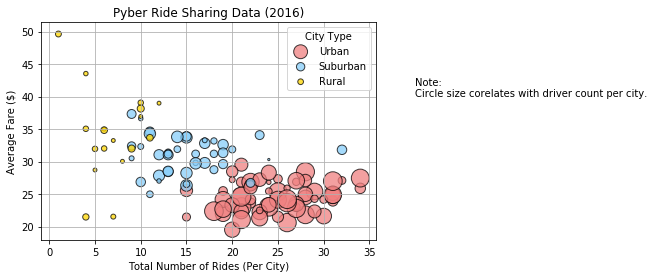

In [16]:
##Create subsets of data for each scatter type

urban_data_df = bubble_df[bubble_df["type"] == "Urban"]
suburban_data_df = bubble_df[bubble_df["type"] == "Suburban"]
rural_data_df = bubble_df[bubble_df["type"] == "Rural"]

plt.scatter(urban_data_df["ride count"], urban_data_df["mean fare"], s=5*urban_data_df["driver count"], c=urban_data_df["color"],
                      edgecolor='black',alpha=0.75)
plt.scatter(suburban_data_df["ride count"], suburban_data_df["mean fare"], s=5*suburban_data_df["driver count"], c=suburban_data_df["color"],
                      edgecolor='black',alpha=0.75)
plt.scatter(rural_data_df["ride count"], rural_data_df["mean fare"], s=5*rural_data_df["driver count"], c=rural_data_df["color"],
                      edgecolor='black',alpha=0.75)
##Set the plot attributes
plt.grid()
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.text(40,40,"Note:\nCircle size corelates with driver count per city.")

plt.legend(('Urban','Suburban','Rural'),title='City Type',loc = 'best')
plt.savefig("bubblechart.png")
plt.show()

In [17]:
##Create a data frame where the totals are grouped by city type

city_type_df = merged_df.reset_index()
city_type_df.head()
city_type_df = pd.DataFrame(city_type_df.groupby("type").sum())
city_type_df.drop(axis=1,labels=["mean fare"],inplace=True)

##Generate a few extra columns for analysis
city_type_df["mean fare"] = round(city_type_df["total fare"]/city_type_df["ride count"],2)
city_type_df["revenue per driver"] = round(city_type_df["total fare"]/city_type_df["driver count"],2)
city_type_df.head()

,driver count,ride count,total fare,mean fare,revenue per driver
type,,,,,
Rural,104,125,4255.02,34.04,40.91
Suburban,638,625,19318.14,30.91,30.28
Urban,2607,1625,40079.08,24.66,15.37


In [18]:
##Set the attributes for the pie chart
citytypes = city_type_df.index
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0.1, 0.05)

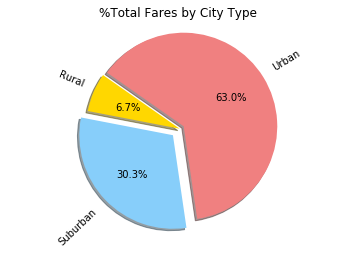

In [19]:
##1. Chart the total fares by city type

pctcounts = city_type_df["total fare"]
plt.title("%Total Fares by City Type")
plt.pie(pctcounts, explode=explode, labels=citytypes, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=145,rotatelabels=True)
plt.axis("equal")
plt.savefig("farepcts.png")
plt.show()

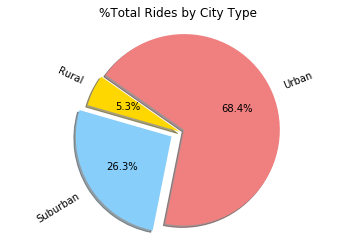

In [20]:
##2. Chart the total rides  by city type

pctcounts = city_type_df["ride count"]
plt.title("%Total Rides by City Type")
plt.pie(pctcounts, explode=explode, labels=citytypes, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=145,rotatelabels=True)
plt.axis("equal")
plt.savefig("ridepcts.png")
plt.show()

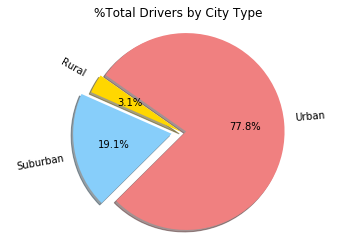

In [21]:
##3. Chart the total drivers by city type

pctcounts = city_type_df["driver count"]
plt.title("%Total Drivers by City Type")
plt.pie(pctcounts, explode=explode, labels=citytypes, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=145,rotatelabels=True)
plt.axis("equal")
plt.savefig("driverpcts.png")
plt.show()

In [22]:
merged_df["ride count"].sum()

2375

In [23]:
#Save the merged dataframe to excel for any further analysis
merged_df.to_excel("citysummary.xlsx")